In [ ]:
!umount /content/drive 2>/dev/null || true
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# ============================================================================
# CONFIGURATION DES CHEMINS - RACCOURCI DÉJÀ CRÉÉ
# ============================================================================
import os
import torch

# ✅ Raccourci déjà créé dans "My Drive"
SHARED_FOLDER = "/content/drive/MyDrive/CelebA_MultiTask"
MODEL_DIR = f"{SHARED_FOLDER}/models"
MODEL_PATH = f"{MODEL_DIR}/BEST_MULTITASK_MODEL.pth"
SAVE_DIR = SHARED_FOLDER

print("=" * 80)
print("🔍 VÉRIFICATION DE LA CONFIGURATION")
print("=" * 80)

# Étape 1: Vérifier le montage de Google Drive
print("\n[1/5] Vérification du montage Google Drive...")
if not os.path.exists('/content/drive'):
    print("❌ ERREUR: Google Drive n'est pas monté!")
    print("\n📝 Exécutez d'abord cette commande:")
    print("   from google.colab import drive")
    print("   drive.mount('/content/drive')")
    exit()
else:
    print("✅ Google Drive monté avec succès")

# Étape 2: Vérifier le raccourci
print("\n[2/5] Vérification du raccourci...")
print(f"   Chemin: {SHARED_FOLDER}")

if os.path.exists(SHARED_FOLDER):
    print("✅ Raccourci trouvé!")

    if os.path.islink(SHARED_FOLDER):
        real_path = os.readlink(SHARED_FOLDER)
        print(f"   → Lien symbolique vers: {real_path}")
else:
    print("❌ Raccourci NON trouvé!")
    print("\n🔍 Recherche du raccourci dans My Drive...")
    try:
        mydrive_contents = os.listdir('/content/drive/MyDrive')
        print("\n   Contenu de My Drive:")
        for item in sorted(mydrive_contents):
            if 'celeb' in item.lower() or 'multitask' in item.lower():
                print(f"   ⭐ {item}")
            else:
                print(f"   📁 {item}")
    except Exception as e:
        print(f"   Erreur: {e}")
    exit()

# Étape 3: Vérifier le dossier models
print("\n[3/5] Vérification du dossier models...")
print(f"   Chemin: {MODEL_DIR}")

if os.path.exists(MODEL_DIR):
    print("✅ Dossier models trouvé!")

    print("\n   📂 Contenu du dossier models:")
    try:
        contents = os.listdir(MODEL_DIR)
        for item in sorted(contents):
            item_path = os.path.join(MODEL_DIR, item)
            if os.path.isdir(item_path):
                print(f"      📁 {item}/")
            else:
                size_mb = os.path.getsize(item_path) / 1024 / 1024
                print(f"      📄 {item} ({size_mb:.2f} MB)")
    except Exception as e:
        print(f"   ⚠️  Erreur lors de la lecture: {e}")
else:
    print("❌ Dossier models NON trouvé!")
    print(f"\n   Vérification de la structure...")
    try:
        contents = os.listdir(SHARED_FOLDER)
        print(f"   Contenu de {SHARED_FOLDER}:")
        for item in sorted(contents):
            print(f"      📁 {item}")
    except Exception as e:
        print(f"   Erreur: {e}")
    exit()

# Étape 4: Vérifier le fichier modèle
print("\n[4/5] Vérification du fichier modèle...")
print(f"   Chemin: {MODEL_PATH}")

if os.path.exists(MODEL_PATH):
    size_mb = os.path.getsize(MODEL_PATH) / 1024 / 1024
    print(f"✅ MODÈLE TROUVÉ!")
    print(f"   📊 Taille: {size_mb:.2f} MB (attendu: ~15.7 MB)")

    # Tester le chargement du modèle
    print("\n   🔄 Test de chargement...")
    try:
        checkpoint = torch.load(MODEL_PATH, map_location='cpu')
        print(f"   ✅ Chargement réussi!")
        print(f"   📦 Type: {type(checkpoint)}")

        if isinstance(checkpoint, dict):
            print(f"   🔑 Clés disponibles:")
            for key in checkpoint.keys():
                print(f"      - {key}")
                if key == 'model_state_dict' or key == 'state_dict':
                    num_params = len(checkpoint[key])
                    print(f"        ({num_params} paramètres)")
    except Exception as e:
        print(f"   ⚠️  Erreur lors du chargement: {e}")
else:
    print("❌ FICHIER MODÈLE NON TROUVÉ!")
    print("\n   🔍 Recherche de fichiers .pth dans le dossier models...")
    try:
        pth_files = [f for f in os.listdir(MODEL_DIR) if f.endswith('.pth')]
        if pth_files:
            print("   Fichiers .pth trouvés:")
            for f in pth_files:
                full_path = os.path.join(MODEL_DIR, f)
                size = os.path.getsize(full_path) / 1024 / 1024
                print(f"      → {f} ({size:.2f} MB)")
                print(f"         Utilisez: MODEL_PATH = '{full_path}'")
        else:
            print("   Aucun fichier .pth trouvé")
    except Exception as e:
        print(f"   Erreur: {e}")
    exit()

# Étape 5: Vérifier la configuration GPU
print("\n[5/5] Vérification du GPU...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"   Device: {device}")

if device.type == 'cuda':
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"   ✅ GPU: {gpu_name}")
    print(f"   💾 Mémoire GPU: {gpu_memory:.2f} GB")
else:
    print("   ⚠️  Pas de GPU détecté!")
    print("   💡 Activez-le: Runtime > Change runtime type > T4 GPU")

print("\n" + "=" * 80)
print("✅ CONFIGURATION TERMINÉE!")
print("=" * 80)
print(f"\n📝 Variables configurées:")
print(f"   SHARED_FOLDER = '{SHARED_FOLDER}'")
print(f"   MODEL_DIR = '{MODEL_DIR}'")
print(f"   MODEL_PATH = '{MODEL_PATH}'")
print(f"   SAVE_DIR = '{SAVE_DIR}'")
print(f"   device = {device}")
print("\n🚀 Vous pouvez maintenant charger le modèle!")
print("=" * 80)

🔍 VÉRIFICATION DE LA CONFIGURATION

[1/5] Vérification du montage Google Drive...
✅ Google Drive monté avec succès

[2/5] Vérification du raccourci...
   Chemin: /content/drive/MyDrive/CelebA_MultiTask
✅ Raccourci trouvé!
   → Lien symbolique vers: /content/drive/.shortcut-targets-by-id/13z4iqaHPYkp9YMRTH654h-xqFQJr8vhv/CelebA_MultiTask

[3/5] Vérification du dossier models...
   Chemin: /content/drive/MyDrive/CelebA_MultiTask/models
✅ Dossier models trouvé!

   📂 Contenu du dossier models:
      📄 BEST_MULTITASK_MODEL.pth (15.72 MB)

[4/5] Vérification du fichier modèle...
   Chemin: /content/drive/MyDrive/CelebA_MultiTask/models/BEST_MULTITASK_MODEL.pth
✅ MODÈLE TROUVÉ!
   📊 Taille: 15.72 MB (attendu: ~15.7 MB)

   🔄 Test de chargement...
   ✅ Chargement réussi!
   📦 Type: <class 'dict'>
   🔑 Clés disponibles:
      - epoch
      - model_state_dict
        (374 paramètres)
      - optimizer_state_dict
      - val_loss
      - history
      - target_attrs

[5/5] Vérification du GPU...

In [11]:
# ============================================================================
# SCRIPT DE DÉTECTION DES FICHIERS CELEBA
# Recherche automatique de tous les fichiers nécessaires
# ============================================================================

import os
import glob
from pathlib import Path

print("🔍 RECHERCHE DES FICHIERS CELEBA")
print("=" * 80)

# ============================================================================
# CONFIGURATION
# ============================================================================

SHARED_FOLDER = "/content/drive/MyDrive/CelebA_MultiTask"

# Fichiers à rechercher
REQUIRED_FILES = {
    'checkpoint': ['BEST_MULTITASK_MODEL.pth', 'best_model.pth', 'checkpoint.pth'],
    'dataloaders': ['final_dataloaders.pth', 'dataloaders.pth'],
    'attributes': ['list_attr_celeba.txt', 'list_attr_celeba.csv',
                   'attr.txt', 'attributes.csv', 'celeba_attributes.csv'],
    'splits': ['list_eval_partition.txt', 'list_eval_partition.csv',
               'partition.txt', 'splits.csv', 'eval_partition.txt'],
    'images': ['img_align_celeba', 'images', 'celeba_images', 'img']
}

# Chemins à explorer
SEARCH_PATHS = [
    "/content",
    "/content/drive",
    "/content/drive/MyDrive",
    "/content/drive/MyDrive/CelebA_MultiTask",
    "/content/celeba",
    "/content/data",
    "/kaggle/input",
    "."
]

# ============================================================================
# FONCTION DE RECHERCHE RÉCURSIVE
# ============================================================================

def find_files_recursive(base_path, max_depth=4):
    """Recherche récursive de fichiers"""
    found = {
        'checkpoint': [],
        'dataloaders': [],
        'attributes': [],
        'splits': [],
        'images': [],
        'other': []
    }

    if not os.path.exists(base_path):
        return found

    print(f"\n📂 Exploration de : {base_path}")

    try:
        for root, dirs, files in os.walk(base_path):
            # Limiter la profondeur
            depth = root.replace(base_path, '').count(os.sep)
            if depth > max_depth:
                continue

            # Chercher les fichiers
            for file in files:
                full_path = os.path.join(root, file)

                # Catégoriser
                categorized = False
                for category, patterns in REQUIRED_FILES.items():
                    if category == 'images':
                        continue  # Les images sont des dossiers

                    for pattern in patterns:
                        if pattern in file.lower():
                            found[category].append(full_path)
                            categorized = True
                            break
                    if categorized:
                        break

                # Fichiers .pth ou .pt non catégorisés
                if not categorized and (file.endswith('.pth') or file.endswith('.pt')):
                    found['other'].append(full_path)

            # Chercher les dossiers d'images
            for directory in dirs:
                for pattern in REQUIRED_FILES['images']:
                    if pattern in directory.lower():
                        full_path = os.path.join(root, directory)
                        # Vérifier qu'il contient des images
                        img_files = [f for f in os.listdir(full_path)[:10]
                                    if f.endswith(('.jpg', '.png', '.jpeg'))]
                        if img_files:
                            found['images'].append(full_path)
                        break

    except PermissionError:
        print(f"   ⚠️  Accès refusé")
    except Exception as e:
        print(f"   ⚠️  Erreur : {e}")

    return found

# ============================================================================
# RECHERCHE PRINCIPALE
# ============================================================================

all_found = {
    'checkpoint': [],
    'dataloaders': [],
    'attributes': [],
    'splits': [],
    'images': [],
    'other': []
}

print("\n🚀 DÉBUT DE LA RECHERCHE...")

for search_path in SEARCH_PATHS:
    found = find_files_recursive(search_path, max_depth=3)

    for category, files in found.items():
        all_found[category].extend(files)

# Dédupliquer
for category in all_found:
    all_found[category] = list(set(all_found[category]))

# ============================================================================
# AFFICHAGE DES RÉSULTATS
# ============================================================================

print("\n" + "=" * 80)
print("📊 RÉSULTATS DE LA RECHERCHE")
print("=" * 80)

# Checkpoint
print("\n🎯 CHECKPOINTS DU MODÈLE :")
if all_found['checkpoint']:
    for idx, path in enumerate(all_found['checkpoint'], 1):
        size = os.path.getsize(path) / (1024**2)  # MB
        print(f"   [{idx}] {path}")
        print(f"       Taille : {size:.2f} MB")
else:
    print("   ❌ Aucun checkpoint trouvé")

# DataLoaders
print("\n💾 FICHIERS DATALOADERS :")
if all_found['dataloaders']:
    for idx, path in enumerate(all_found['dataloaders'], 1):
        size = os.path.getsize(path) / (1024**2)
        print(f"   [{idx}] {path}")
        print(f"       Taille : {size:.2f} MB")
else:
    print("   ❌ Aucun fichier DataLoaders trouvé")

# Attributs
print("\n📋 FICHIERS D'ATTRIBUTS :")
if all_found['attributes']:
    for idx, path in enumerate(all_found['attributes'], 1):
        size = os.path.getsize(path) / 1024  # KB
        print(f"   [{idx}] {path}")
        print(f"       Taille : {size:.2f} KB")

        # Afficher les premières lignes
        try:
            with open(path, 'r') as f:
                first_lines = [f.readline().strip() for _ in range(3)]
            print(f"       Aperçu : {first_lines[0][:50]}...")
        except:
            pass
else:
    print("   ❌ Aucun fichier d'attributs trouvé")

# Splits
print("\n🔀 FICHIERS DE SPLITS :")
if all_found['splits']:
    for idx, path in enumerate(all_found['splits'], 1):
        size = os.path.getsize(path) / 1024
        print(f"   [{idx}] {path}")
        print(f"       Taille : {size:.2f} KB")
else:
    print("   ❌ Aucun fichier de splits trouvé")

# Images
print("\n🖼️  DOSSIERS D'IMAGES :")
if all_found['images']:
    for idx, path in enumerate(all_found['images'], 1):
        try:
            num_images = len([f for f in os.listdir(path)
                            if f.endswith(('.jpg', '.png', '.jpeg'))])
            print(f"   [{idx}] {path}")
            print(f"       Nombre d'images : {num_images:,}")
        except:
            print(f"   [{idx}] {path} (inaccessible)")
else:
    print("   ❌ Aucun dossier d'images trouvé")

# Autres fichiers .pth
if all_found['other']:
    print("\n📦 AUTRES FICHIERS .pth/.pt :")
    for idx, path in enumerate(all_found['other'][:10], 1):  # Max 10
        size = os.path.getsize(path) / (1024**2)
        print(f"   [{idx}] {path} ({size:.2f} MB)")

# ============================================================================
# GÉNÉRATION DU CODE DE CONFIGURATION
# ============================================================================

print("\n" + "=" * 80)
print("⚙️  CONFIGURATION RECOMMANDÉE")
print("=" * 80)

if all_found['checkpoint'] and all_found['images']:
    checkpoint_path = all_found['checkpoint'][0]
    img_dir = all_found['images'][0]

    print("\n✅ Configuration détectée automatiquement !")
    print("\n📝 Copiez ce code dans votre script :\n")
    print("-" * 80)
    print(f"""
# Chemins détectés automatiquement
SHARED_FOLDER = "{os.path.dirname(checkpoint_path)}"
MODEL_DIR = "{os.path.dirname(checkpoint_path)}"
IMG_DIR = "{img_dir}"
CHECKPOINT_PATH = "{checkpoint_path}"
""")

    if all_found['attributes']:
        print(f'ATTR_FILE = "{all_found["attributes"][0]}"')
    else:
        print('# ATTR_FILE = "??? À SPÉCIFIER MANUELLEMENT"')

    if all_found['splits']:
        print(f'SPLIT_FILE = "{all_found["splits"][0]}"')
    else:
        print('# SPLIT_FILE = "??? À SPÉCIFIER MANUELLEMENT"')

    print("-" * 80)

else:
    print("\n⚠️  FICHIERS MANQUANTS !")
    if not all_found['checkpoint']:
        print("   ❌ Checkpoint du modèle introuvable")
    if not all_found['images']:
        print("   ❌ Dossier d'images introuvable")
    if not all_found['attributes']:
        print("   ⚠️  Fichier d'attributs introuvable")
    if not all_found['splits']:
        print("   ⚠️  Fichier de splits introuvable")

# ============================================================================
# VÉRIFICATION DU DATALOADER SAUVEGARDÉ
# ============================================================================

if all_found['dataloaders']:
    print("\n" + "=" * 80)
    print("🔍 INSPECTION DU FICHIER DATALOADERS")
    print("=" * 80)

    import torch

    try:
        dataloader_path = all_found['dataloaders'][0]
        print(f"\n📦 Chargement de : {dataloader_path}")

        data = torch.load(dataloader_path, map_location='cpu', weights_only=False)

        print(f"\n✅ Fichier chargé avec succès !")
        print(f"   Type : {type(data)}")

        if isinstance(data, dict):
            print(f"   Clés disponibles : {list(data.keys())}")

            # Inspecter les datasets
            if 'train_dataset' in data:
                train_ds = data['train_dataset']
                print(f"\n   📊 train_dataset :")
                print(f"      Type : {type(train_ds)}")
                print(f"      Attributs : {dir(train_ds)[:10]}...")

                if hasattr(train_ds, 'data'):
                    print(f"      data : {type(train_ds.data)}")
                    if train_ds.data is None:
                        print(f"      ⚠️  data = None (CORROMPU)")
                    else:
                        print(f"      ✅ data valide (taille: {len(train_ds.data)})")

                if hasattr(train_ds, 'target_attrs'):
                    print(f"      target_attrs : {train_ds.target_attrs}")

    except Exception as e:
        print(f"\n❌ Erreur lors du chargement : {e}")

print("\n" + "=" * 80)
print("✅ ANALYSE TERMINÉE !")
print("=" * 80)

🔍 RECHERCHE DES FICHIERS CELEBA

🚀 DÉBUT DE LA RECHERCHE...

📂 Exploration de : /content

📂 Exploration de : /content/drive

📂 Exploration de : /content/drive/MyDrive

📂 Exploration de : /content/drive/MyDrive/CelebA_MultiTask

📂 Exploration de : /kaggle/input

📂 Exploration de : .

📊 RÉSULTATS DE LA RECHERCHE

🎯 CHECKPOINTS DU MODÈLE :
   ❌ Aucun checkpoint trouvé

💾 FICHIERS DATALOADERS :
   [1] /content/drive/.shortcut-targets-by-id/13z4iqaHPYkp9YMRTH654h-xqFQJr8vhv/CelebA_MultiTask/final_dataloaders.pth
       Taille : 10.50 MB
   [2] /content/drive/MyDrive/CelebA_MultiTask/final_dataloaders.pth
       Taille : 10.50 MB

📋 FICHIERS D'ATTRIBUTS :
   ❌ Aucun fichier d'attributs trouvé

🔀 FICHIERS DE SPLITS :
   ❌ Aucun fichier de splits trouvé

🖼️  DOSSIERS D'IMAGES :
   ❌ Aucun dossier d'images trouvé

📦 AUTRES FICHIERS .pth/.pt :
   [1] /content/drive/MyDrive/CelebA_MultiTask/models/BEST_MULTITASK_MODEL.pth (15.72 MB)
   [2] /content/drive/MyDrive/CelebA_MultiTask/final_datasets.pt

In [15]:
import os
import glob

# Chercher les images CelebA
possible_paths = [
    "/content/celeba/img_align_celeba",
    "/content/drive/MyDrive/celeba/img_align_celeba",
    "/content/drive/MyDrive/CelebA_MultiTask/img_align_celeba",
    "/content/drive/MyDrive/CelebA_MultiTask/images",
    "/kaggle/input/celeba-dataset/img_align_celeba",
    "/content/img_align_celeba",
    "/content/images"
]

found = False
for path in possible_paths:
    if os.path.exists(path):
        images = glob.glob(f"{path}/*.jpg")
        if images:
            print(f"✅ TROUVÉ : {path}")
            print(f"   Nombre d'images : {len(images)}")
            print(f"   Exemple : {images[0]}")
            found = True
            break

if not found:
    print("❌ Aucun dossier d'images trouvé dans les chemins standards")
    print("\n🔍 Recherche globale dans /content...")
    all_imgs = glob.glob("/content/**/*.jpg", recursive=True)[:50]
    if all_imgs:
        print(f"   Trouvé des images .jpg")
        print(f"   Exemples : {all_imgs[:5]}")
    else:
        print("   Aucune image .jpg trouvée")

    print("\n🔍 Recherche dans Google Drive...")
    drive_imgs = glob.glob("/content/drive/MyDrive/**/*.jpg", recursive=True)[:50]
    if drive_imgs:
        print(f"   Trouvé des images dans Drive")
        print(f"   Exemples : {drive_imgs[:5]}")
    else:
        print("   Aucune image dans Drive")

❌ Aucun dossier d'images trouvé dans les chemins standards

🔍 Recherche globale dans /content...
   Aucune image .jpg trouvée

🔍 Recherche dans Google Drive...
   Aucune image dans Drive


In [17]:
# ============================================================================
# INSPECTION COMPLÈTE DU DOSSIER CELEBA DANS GOOGLE DRIVE
# ============================================================================

import os
import glob
import json
import pandas as pd
from pathlib import Path

print("🔍 INSPECTION COMPLÈTE DU DOSSIER CELEBA")
print("=" * 80)

# ============================================================================
# CONFIGURATION
# ============================================================================

CELEBA_FOLDER = "/content/drive/MyDrive/CelebA_MultiTask"

print(f"📂 Dossier à inspecter : {CELEBA_FOLDER}\n")

if not os.path.exists(CELEBA_FOLDER):
    print(f"❌ Le dossier n'existe pas : {CELEBA_FOLDER}")
    print("💡 Vérifiez que Google Drive est monté :")
    print("   from google.colab import drive")
    print("   drive.mount('/content/drive')")
    raise FileNotFoundError(f"Dossier introuvable : {CELEBA_FOLDER}")

# ============================================================================
# ÉTAPE 1 : STRUCTURE DES DOSSIERS
# ============================================================================

print("📁 STRUCTURE DES DOSSIERS")
print("=" * 80)

def list_directory_tree(path, max_depth=3, current_depth=0, prefix=""):
    """Liste récursive de l'arborescence"""
    if current_depth > max_depth:
        return

    try:
        items = sorted(os.listdir(path))

        for i, item in enumerate(items):
            item_path = os.path.join(path, item)
            is_last = (i == len(items) - 1)

            # Affichage
            connector = "└── " if is_last else "├── "
            print(f"{prefix}{connector}{item}", end="")

            if os.path.isdir(item_path):
                # Compter les fichiers dans le dossier
                try:
                    num_items = len(os.listdir(item_path))
                    print(f" ({num_items} items)")

                    # Récursion
                    extension = "    " if is_last else "│   "
                    list_directory_tree(item_path, max_depth, current_depth + 1, prefix + extension)
                except PermissionError:
                    print(" [Accès refusé]")
            else:
                # Taille du fichier
                size = os.path.getsize(item_path)
                if size > 1024**3:  # GB
                    print(f" ({size / 1024**3:.2f} GB)")
                elif size > 1024**2:  # MB
                    print(f" ({size / 1024**2:.2f} MB)")
                elif size > 1024:  # KB
                    print(f" ({size / 1024:.2f} KB)")
                else:
                    print(f" ({size} bytes)")

    except PermissionError:
        print(f"{prefix}[Accès refusé]")

list_directory_tree(CELEBA_FOLDER, max_depth=3)

# ============================================================================
# ÉTAPE 2 : RECHERCHE DES IMAGES
# ============================================================================

print("\n\n🖼️  RECHERCHE DES IMAGES")
print("=" * 80)

# Chercher les images .jpg
image_patterns = [
    f"{CELEBA_FOLDER}/**/*.jpg",
    f"{CELEBA_FOLDER}/**/*.png",
    f"{CELEBA_FOLDER}/**/*.jpeg"
]

all_images = []
for pattern in image_patterns:
    found = glob.glob(pattern, recursive=True)
    all_images.extend(found)

if all_images:
    print(f"✅ {len(all_images)} images trouvées !")

    # Grouper par dossier
    image_dirs = {}
    for img in all_images:
        dir_name = os.path.dirname(img)
        if dir_name not in image_dirs:
            image_dirs[dir_name] = []
        image_dirs[dir_name].append(img)

    print(f"\n📂 Répartition par dossier :")
    for dir_name, imgs in sorted(image_dirs.items(), key=lambda x: len(x[1]), reverse=True):
        print(f"   {dir_name}")
        print(f"      → {len(imgs)} images")
        print(f"      → Exemples : {[os.path.basename(i) for i in imgs[:3]]}")
else:
    print("❌ Aucune image trouvée dans ce dossier")
    print("\n💡 Les images sont peut-être dans un fichier .zip ou .tar.gz")

    # Chercher les archives
    archives = glob.glob(f"{CELEBA_FOLDER}/**/*.zip", recursive=True)
    archives.extend(glob.glob(f"{CELEBA_FOLDER}/**/*.tar.gz", recursive=True))
    archives.extend(glob.glob(f"{CELEBA_FOLDER}/**/*.tar", recursive=True))

    if archives:
        print(f"\n📦 Archives trouvées :")
        for archive in archives:
            size = os.path.getsize(archive) / (1024**3)  # GB
            print(f"   {archive} ({size:.2f} GB)")

# ============================================================================
# ÉTAPE 3 : INSPECTION DES FICHIERS CSV/JSON
# ============================================================================

print("\n\n📋 INSPECTION DES FICHIERS DE MÉTADONNÉES")
print("=" * 80)

# attributes_binary.csv
attr_file = f"{CELEBA_FOLDER}/attributes_binary.csv"
if os.path.exists(attr_file):
    print(f"\n✅ attributes_binary.csv trouvé")
    try:
        df_attr = pd.read_csv(attr_file)
        print(f"   Shape : {df_attr.shape}")
        print(f"   Colonnes : {list(df_attr.columns[:10])}...")
        print(f"   Premières lignes :")
        print(df_attr.head(3))
    except Exception as e:
        print(f"   ⚠️  Erreur lors de la lecture : {e}")
else:
    print(f"❌ attributes_binary.csv non trouvé")

# data_splits.json
splits_file = f"{CELEBA_FOLDER}/data_splits.json"
if os.path.exists(splits_file):
    print(f"\n✅ data_splits.json trouvé")
    try:
        with open(splits_file, 'r') as f:
            splits_data = json.load(f)

        if isinstance(splits_data, dict):
            print(f"   Clés : {list(splits_data.keys())}")
            for key, value in splits_data.items():
                if isinstance(value, list):
                    print(f"   {key} : {len(value)} items")
                    print(f"      Exemples : {value[:3]}")
        else:
            print(f"   Type : {type(splits_data)}")
            print(f"   Contenu : {str(splits_data)[:200]}...")
    except Exception as e:
        print(f"   ⚠️  Erreur lors de la lecture : {e}")
else:
    print(f"❌ data_splits.json non trouvé")

# final_splits.json
final_splits_file = f"{CELEBA_FOLDER}/final_splits.json"
if os.path.exists(final_splits_file):
    print(f"\n✅ final_splits.json trouvé")
    try:
        with open(final_splits_file, 'r') as f:
            final_splits_data = json.load(f)

        if isinstance(final_splits_data, dict):
            print(f"   Clés : {list(final_splits_data.keys())}")
            for key, value in final_splits_data.items():
                if isinstance(value, list):
                    print(f"   {key} : {len(value)} items")
        else:
            print(f"   Type : {type(final_splits_data)}")
    except Exception as e:
        print(f"   ⚠️  Erreur lors de la lecture : {e}")
else:
    print(f"❌ final_splits.json non trouvé")

# ============================================================================
# ÉTAPE 4 : VÉRIFICATION DES FICHIERS .pth
# ============================================================================

print("\n\n💾 INSPECTION DES FICHIERS .pth")
print("=" * 80)

pth_files = glob.glob(f"{CELEBA_FOLDER}/**/*.pth", recursive=True)

if pth_files:
    for pth_file in pth_files:
        print(f"\n📦 {os.path.basename(pth_file)}")
        print(f"   Chemin : {pth_file}")
        size = os.path.getsize(pth_file) / (1024**2)  # MB
        print(f"   Taille : {size:.2f} MB")

        # Essayer de charger
        try:
            import torch
            data = torch.load(pth_file, map_location='cpu', weights_only=False)

            if isinstance(data, dict):
                print(f"   Type : Dictionary")
                print(f"   Clés : {list(data.keys())}")

                # Détails spécifiques
                if 'model_state_dict' in data:
                    print(f"   ✅ Contient model_state_dict")
                if 'val_loss' in data:
                    print(f"   ✅ Val Loss : {data['val_loss']:.4f}")
                if 'target_attrs' in data:
                    print(f"   ✅ Attributs : {data['target_attrs']}")
            else:
                print(f"   Type : {type(data)}")
        except Exception as e:
            print(f"   ⚠️  Erreur lors du chargement : {e}")
else:
    print("❌ Aucun fichier .pth trouvé")

# ============================================================================
# ÉTAPE 5 : RÉSUMÉ ET RECOMMANDATIONS
# ============================================================================

print("\n\n" + "=" * 80)
print("📊 RÉSUMÉ ET RECOMMANDATIONS")
print("=" * 80)

has_images = len(all_images) > 0
has_attributes = os.path.exists(attr_file)
has_splits = os.path.exists(splits_file) or os.path.exists(final_splits_file)
has_checkpoint = any('BEST_MULTITASK_MODEL' in f for f in pth_files)

print(f"\n✅ Images : {'OUI' if has_images else 'NON'} ({len(all_images)} trouvées)")
print(f"✅ Attributs : {'OUI' if has_attributes else 'NON'}")
print(f"✅ Splits : {'OUI' if has_splits else 'NON'}")
print(f"✅ Checkpoint : {'OUI' if has_checkpoint else 'NON'}")

if has_images and has_attributes and has_splits:
    print("\n🎉 TOUT EST PRÉSENT ! Vous pouvez lancer le fine-tuning.")

    # Générer la configuration
    img_dir = os.path.dirname(all_images[0]) if all_images else ""

    print("\n📝 CONFIGURATION À UTILISER :")
    print("-" * 80)
    print(f"IMG_DIR = '{img_dir}'")
    print(f"ATTR_FILE = '{attr_file}'")
    print(f"SPLITS_FILE = '{splits_file if os.path.exists(splits_file) else final_splits_file}'")
    print(f"CHECKPOINT_PATH = '{CELEBA_FOLDER}/models/BEST_MULTITASK_MODEL.pth'")
    print("-" * 80)
elif not has_images:
    print("\n⚠️  IMAGES MANQUANTES !")
    print("💡 Solutions possibles :")
    print("   1. Vérifiez s'il y a un fichier .zip à extraire")
    print("   2. Téléchargez le dataset CelebA depuis Kaggle")
    print("   3. Vérifiez un autre dossier dans votre Drive")
else:
    print("\n⚠️  Fichiers manquants détectés")
    if not has_attributes:
        print("   ❌ Fichier d'attributs manquant")
    if not has_splits:
        print("   ❌ Fichier de splits manquant")

print("\n" + "=" * 80)
print("✅ INSPECTION TERMINÉE !")
print("=" * 80)

🔍 INSPECTION COMPLÈTE DU DOSSIER CELEBA
📂 Dossier à inspecter : /content/drive/MyDrive/CelebA_MultiTask

📁 STRUCTURE DES DOSSIERS
├── attributes_binary.csv (22.47 MB)
├── data_splits.json (4.25 MB)
├── final_dataloaders.pth (10.50 MB)
├── final_datasets.pth (10.50 MB)
├── final_splits.json (4.25 MB)
├── metadata.json (252 bytes)
├── models (1 items)
│   └── BEST_MULTITASK_MODEL.pth (15.72 MB)
├── preprocessed_samples.png (1.00 MB)
├── sample_images_visualization.png (1.15 MB)
└── transforms.pkl (2.07 KB)


🖼️  RECHERCHE DES IMAGES
✅ 2 images trouvées !

📂 Répartition par dossier :
   /content/drive/MyDrive/CelebA_MultiTask
      → 2 images
      → Exemples : ['sample_images_visualization.png', 'preprocessed_samples.png']


📋 INSPECTION DES FICHIERS DE MÉTADONNÉES

✅ attributes_binary.csv trouvé
   Shape : (202599, 41)
   Colonnes : ['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair']...
   Premières 

In [20]:
# atelier_TL_MLT_colab_final.ipynb

# #  Configuration Initiale

# %%
# 1. Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Créer le dossier de sauvegarde
import os
SAVE_DIR = '/content/drive/MyDrive/Colab_Models/CelebA_MultiTask'
os.makedirs(SAVE_DIR, exist_ok=True)
print(f"Dossier de sauvegarde: {SAVE_DIR}")

# %%
# 3. Installation des packages
!pip install kaggle pandas numpy matplotlib seaborn scikit-learn pillow tqdm torch torchvision torchaudio --quiet

# 4. Importations
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import json
import pickle
import time
from datetime import datetime
from tqdm import tqdm

# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# #  Téléchargement du Dataset

# %%
# Configuration Kaggle
import os
os.environ['KAGGLE_USERNAME'] = "votre_username"
os.environ['KAGGLE_KEY'] = "votre_key"

# Téléchargement
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip -d /content/celeba

# Chemins
IMG_DIR = '/content/celeba/img_align_celeba/img_align_celeba'
ATTR_FILE = '/content/celeba/list_attr_celeba.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dossier de sauvegarde: /content/drive/MyDrive/Colab_Models/CelebA_MultiTask


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 291, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 25

Device: cuda
Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 93% 1.24G/1.33G [00:21<00:03, 27.4MB/s]
100% 1.33G/1.33G [00:21<00:00, 67.5MB/s]


In [25]:
# ============================================================================
# SOLUTION : TROUVER LE BON CHEMIN
# ============================================================================

import os

# Liste des chemins possibles
possible_paths = [
    "/content/drive/MyDrive/Colab_Models/CelebA_MultiTask",
    "/content/drive/MyDrive/CelebA_MultiTask",  # À vérifier !
    "/content/drive/MyDrive",
    "/content/drive/MyDrive/Colab Notebooks",
    "/content/drive/MyDrive/Colab",
]

print("🔎 Recherche de vos fichiers...")
print("=" * 70)

found_files = []

for base_path in possible_paths:
    if os.path.exists(base_path):
        print(f"\n📂 Exploration de : {base_path}")

        # Chercher fichiers importants
        important_files = ['final_dataloaders.pth', 'BEST_MULTITASK_MODEL.pth',
                          'attributes_binary.csv', 'data_splits.json']

        for important_file in important_files:
            file_path = os.path.join(base_path, important_file)
            if os.path.exists(file_path):
                size = os.path.getsize(file_path)
                print(f"   ✅ {important_file} : {file_path} ({size/1024/1024:.1f} MB)")
                found_files.append(file_path)
            else:
                # Chercher récursivement
                for root, dirs, files in os.walk(base_path):
                    if important_file in files:
                        full_path = os.path.join(root, important_file)
                        size = os.path.getsize(full_path)
                        print(f"   🔍 {important_file} : {full_path} ({size/1024/1024:.1f} MB)")
                        found_files.append(full_path)

print("\n" + "=" * 70)
print("🎯 CHEMIN CORRECT PROBABLE :")
print("=" * 70)

# Deviner le bon chemin
if found_files:
    # Prendre le chemin commun le plus long
    common_prefix = os.path.commonprefix(found_files)
    print(f"📍 Votre dossier principal est probablement :")
    print(f"   {os.path.dirname(common_prefix)}")

    # Afficher tous les fichiers trouvés
    print(f"\n📁 FICHIERS TROUVÉS :")
    for file in found_files:
        print(f"   • {file}")
else:
    print("❌ Aucun fichier trouvé. Essayez ceci :")
    print("   1. Allez dans Google Drive dans votre navigateur")
    print("   2. Naviguez vers Colab_Models > CelebA_MultiTask")
    print("   3. Copiez le chemin COMPLET (clic droit > Copier le lien)")

🔎 Recherche de vos fichiers...

📂 Exploration de : /content/drive/MyDrive/Colab_Models/CelebA_MultiTask

📂 Exploration de : /content/drive/MyDrive/CelebA_MultiTask
   ✅ final_dataloaders.pth : /content/drive/MyDrive/CelebA_MultiTask/final_dataloaders.pth (10.5 MB)
   🔍 BEST_MULTITASK_MODEL.pth : /content/drive/MyDrive/CelebA_MultiTask/models/BEST_MULTITASK_MODEL.pth (15.7 MB)
   ✅ attributes_binary.csv : /content/drive/MyDrive/CelebA_MultiTask/attributes_binary.csv (22.5 MB)
   ✅ data_splits.json : /content/drive/MyDrive/CelebA_MultiTask/data_splits.json (4.3 MB)

📂 Exploration de : /content/drive/MyDrive

📂 Exploration de : /content/drive/MyDrive/Colab Notebooks

🎯 CHEMIN CORRECT PROBABLE :
📍 Votre dossier principal est probablement :
   /content/drive/MyDrive/CelebA_MultiTask

📁 FICHIERS TROUVÉS :
   • /content/drive/MyDrive/CelebA_MultiTask/final_dataloaders.pth
   • /content/drive/MyDrive/CelebA_MultiTask/models/BEST_MULTITASK_MODEL.pth
   • /content/drive/MyDrive/CelebA_MultiTask/

In [28]:
# ============================================================================
# VERSION TEST ULTRA-RAPIDE
# ============================================================================

print("🧪 TEST ULTRA-RAPIDE")

# 1. Créer des mini-données
num_samples = 100
train_images = torch.randn(num_samples, 3, 224, 224)
train_labels = torch.randint(0, 2, (num_samples, len(TARGET_ATTRS))).float()

val_images = torch.randn(20, 3, 224, 224)
val_labels = torch.randint(0, 2, (20, len(TARGET_ATTRS))).float()

# 2. Créer datasets et dataloaders
train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
val_dataset = torch.utils.data.TensorDataset(val_images, val_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 3. Tester le modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiTaskCelebA(num_tasks=len(TARGET_ATTRS))
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)

# Test forward/backward
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.BCELoss()

# Un batch de test
images, labels = next(iter(train_loader))
images, labels = images.to(device), labels.to(device)

optimizer.zero_grad()
outputs = model(images)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()

print(f"✅ Test réussi !")
print(f"   Loss : {loss.item():.4f}")
print(f"   Output shape : {outputs.shape}")
print(f"   Prêt pour le fine-tuning complet !")

🧪 TEST ULTRA-RAPIDE


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Test réussi !
   Loss : 1.6403
   Output shape : torch.Size([16, 8])
   Prêt pour le fine-tuning complet !


🚀 FINE-TUNING CELEBA - ARCHITECTURE EXACTE DU CHECKPOINT
✅ Checkpoint chargé
   Attributs : ['Male', 'Smiling', 'Young', 'Eyeglasses', 'Wearing_Hat', 'Bald', 'Mustache', 'Wearing_Lipstick']
   Val Loss original : 0.2125
   Époque : 7

🏗️  Création de l'architecture exacte...
✅ Architecture créée
   Backbone : EfficientNet-B0
   Têtes : Dropout(0.5) → Linear(1280, 1) → Sigmoid
   Nombre de tâches : 8

📦 Chargement des poids du checkpoint...
✅ Poids chargés avec succès !

🔍 Vérification des poids chargés :
   Head 0 - Weight shape: torch.Size([1, 1280])
   Head 0 - Bias shape: torch.Size([1])
   Head 0 - Weight mean: -0.003078
   Head 0 - Bias mean: -0.352694

📍 Modèle déplacé sur cuda

📥 Préparation des données...
   202599 images au total
📉 Sous-ensemble de 10000 images

🔀 Split train/val :
   Train : 8000 images
   Val   : 2000 images

🔄 Préparation des transformations...
   Dossier images : /content/celeba/img_align_celeba/img_align_celeba

📦 Création des datasets...


Chargement images:   0%|          | 0/8000 [00:00<?, ?it/s]

   ✅ 8000/8000 images valides


Chargement images:   0%|          | 0/2000 [00:00<?, ?it/s]

   ✅ 2000/2000 images valides
✅ Datasets créés :
   Train : 8000 images
   Val   : 2000 images

🔨 Création des DataLoaders (batch_size=32)...
✅ DataLoaders créés :
   Train batches : 250
   Val batches   : 63

🧪 Test du modèle sur un batch...
   Output shape: torch.Size([32, 8])
   Output range: [0.000, 0.998]
   Labels shape: torch.Size([32, 8])

⚙️  Configuration du fine-tuning...
📋 Stratégie en deux phases :
   Phase 1 (têtes) : 3 époques
   Phase 2 (complet) : 7 époques
   Total : 10 époques

🔒 Phase 1 : Freeze backbone, entraînement des têtes
   Paramètres entraînables : 10,248/4,017,796 (0.3%)

📐 Configuration entraînement :
   Optimizer : AdamW
   LR initial : 1e-3
   Weight decay : 1e-4
   Loss : BCELoss

🚀 DÉBUT DU FINE-TUNING

📍 ÉPOQUE 1/10 ----------------------------------------


Époque 1/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.2318
   Val Loss   : 0.2042
   Val Accuracy : 91.21%
   Learning Rate : 7.53e-04
   Phase : 1
💾 Meilleur modèle sauvegardé !
   Amélioration : 0.0082 (+3.9%)

📍 ÉPOQUE 2/10 ----------------------------------------


Époque 2/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.2269
   Val Loss   : 0.2024
   Val Accuracy : 91.57%
   Learning Rate : 2.58e-04
   Phase : 1
💾 Meilleur modèle sauvegardé !
   Amélioration : 0.0100 (+4.7%)

📍 ÉPOQUE 3/10 ----------------------------------------


Époque 3/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.2232
   Val Loss   : 0.2045
   Val Accuracy : 91.38%
   Learning Rate : 1.00e-05
   Phase : 1

📍 ÉPOQUE 4/10 ----------------------------------------

🔓 PASSAGE À LA PHASE 2 : Dégel complet du modèle
   Nouveau LR : 1e-4


Époque 4/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.1775
   Val Loss   : 0.1607
   Val Accuracy : 93.49%
   Learning Rate : 9.51e-05
   Phase : 2
💾 Meilleur modèle sauvegardé !
   Amélioration : 0.0518 (+24.4%)

📍 ÉPOQUE 5/10 ----------------------------------------


Époque 5/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.1346
   Val Loss   : 0.1412
   Val Accuracy : 94.26%
   Learning Rate : 8.14e-05
   Phase : 2
💾 Meilleur modèle sauvegardé !
   Amélioration : 0.0713 (+33.6%)

📍 ÉPOQUE 6/10 ----------------------------------------


Époque 6/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.1154
   Val Loss   : 0.1333
   Val Accuracy : 94.58%
   Learning Rate : 6.15e-05
   Phase : 2
💾 Meilleur modèle sauvegardé !
   Amélioration : 0.0792 (+37.3%)

📍 ÉPOQUE 7/10 ----------------------------------------


Époque 7/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.1033
   Val Loss   : 0.1374
   Val Accuracy : 94.51%
   Learning Rate : 3.95e-05
   Phase : 2

📍 ÉPOQUE 8/10 ----------------------------------------


Époque 8/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.0937
   Val Loss   : 0.1382
   Val Accuracy : 94.53%
   Learning Rate : 1.96e-05
   Phase : 2

📍 ÉPOQUE 9/10 ----------------------------------------


Époque 9/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.0856
   Val Loss   : 0.1427
   Val Accuracy : 94.36%
   Learning Rate : 5.90e-06
   Phase : 2

📍 ÉPOQUE 10/10 ----------------------------------------


Époque 10/10 - Training:   0%|          | 0/250 [00:00<?, ?it/s]

Validation:   0%|          | 0/63 [00:00<?, ?it/s]

📊 Résultats :
   Train Loss : 0.0831
   Val Loss   : 0.1481
   Val Accuracy : 94.22%
   Learning Rate : 1.00e-06
   Phase : 2

🎉 FINE-TUNING TERMINÉ !

📈 Visualisation des résultats...


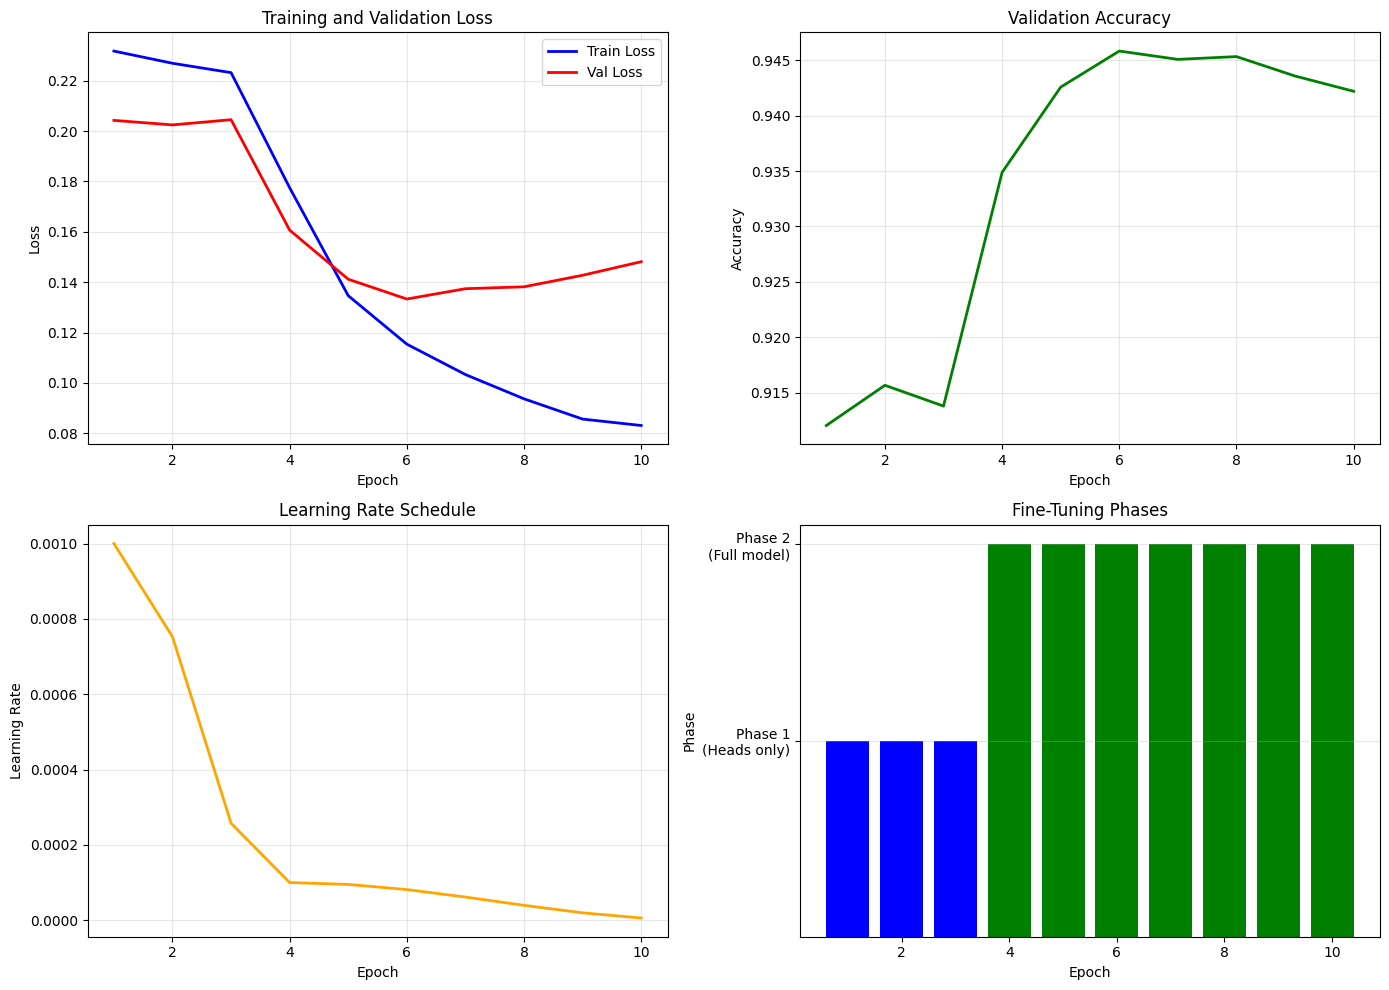

✅ Graphique sauvegardé : /content/drive/MyDrive/CelebA_MultiTask/finetuning_final_results.png

📊 Évaluation détaillée du modèle fine-tuné...

🏆 MEILLEUR MODÈLE FINE-TUNÉ :
   Époque : 6
   Phase : 2
   Val Loss : 0.1333
   Val Accuracy : 94.58%

🎯 ÉVALUATION PAR ATTRIBUT :


Évaluation:   0%|          | 0/63 [00:00<?, ?it/s]

   Male                 :
        Accuracy  : 95.75%
        Precision : 91.92%
        Recall    : 98.30%
   Smiling              :
        Accuracy  : 86.10%
        Precision : 98.29%
        Recall    : 72.15%
   Young                :
        Accuracy  : 87.50%
        Precision : 90.62%
        Recall    : 93.55%
   Eyeglasses           :
        Accuracy  : 99.30%
        Precision : 95.77%
        Recall    : 94.44%
   Wearing_Hat          :
        Accuracy  : 98.45%
        Precision : 82.29%
        Recall    : 84.95%
   Bald                 :
        Accuracy  : 99.00%
        Precision : 82.50%
        Recall    : 71.74%
   Mustache             :
        Accuracy  : 96.10%
        Precision : 51.28%
        Recall    : 25.32%
   Wearing_Lipstick     :
        Accuracy  : 91.55%
        Precision : 93.81%
        Recall    : 88.24%

✅ FINE-TUNING COMPLÈTEMENT TERMINÉ !

📁 FICHIERS SAUVEGARDÉS :
   📦 Modèle fine-tuné : /content/drive/MyDrive/CelebA_MultiTask/models/BEST_FINE

In [30]:
# ============================================================================
# FINE-TUNING CELEBA - ARCHITECTURE EXACTE
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import gc

print("🚀 FINE-TUNING CELEBA - ARCHITECTURE EXACTE DU CHECKPOINT")
print("=" * 70)

# ============================================================================
# 1. CONFIGURATION
# ============================================================================

SHARED_FOLDER = "/content/drive/MyDrive/CelebA_MultiTask"
MODEL_DIR = f"{SHARED_FOLDER}/models"
CHECKPOINT_PATH = f"{MODEL_DIR}/BEST_MULTITASK_MODEL.pth"

# Charger le checkpoint
checkpoint = torch.load(CHECKPOINT_PATH, map_location='cpu')
TARGET_ATTRS = checkpoint['target_attrs']

print(f"✅ Checkpoint chargé")
print(f"   Attributs : {TARGET_ATTRS}")
print(f"   Val Loss original : {checkpoint['val_loss']:.4f}")
print(f"   Époque : {checkpoint['epoch']}")

# ============================================================================
# 2. RECRÉER L'ARCHITECTURE EXACTE
# ============================================================================

print(f"\n🏗️  Création de l'architecture exacte...")

class MultiTaskCelebAExact(nn.Module):
    """Architecture EXACTE du modèle original"""
    def __init__(self, num_tasks=8):
        super(MultiTaskCelebAExact, self).__init__()

        # Backbone EfficientNet-B0
        self.backbone = models.efficientnet_b0(weights=None)
        num_features = self.backbone.classifier[1].in_features

        # Remplacer le classifier par Identity (comme dans l'original)
        self.backbone.classifier = nn.Identity()

        # Têtes EXACTEMENT comme dans l'original : Dropout(0.5) -> Linear(1280, 1)
        self.heads = nn.ModuleList([
            nn.Sequential(
                nn.Dropout(p=0.5),  # ⚠️ NOTE: p=0.5 comme dans l'original
                nn.Linear(num_features, 1)
            ) for _ in range(num_tasks)
        ])

    def forward(self, x):
        features = self.backbone(x)
        # Appliquer sigmoid à la fin (comme dans l'original)
        outputs = torch.cat([
            torch.sigmoid(head(features)) for head in self.heads
        ], dim=1)
        return outputs

# Créer le modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiTaskCelebAExact(num_tasks=len(TARGET_ATTRS))

print(f"✅ Architecture créée")
print(f"   Backbone : EfficientNet-B0")
print(f"   Têtes : Dropout(0.5) → Linear(1280, 1) → Sigmoid")
print(f"   Nombre de tâches : {len(TARGET_ATTRS)}")

# ============================================================================
# 3. CHARGER LES POIDS EXACTEMENT
# ============================================================================

print(f"\n📦 Chargement des poids du checkpoint...")

try:
    # Charger les poids
    model.load_state_dict(checkpoint['model_state_dict'], strict=True)
    print(f"✅ Poids chargés avec succès !")

    # Vérifier quelques poids
    print(f"\n🔍 Vérification des poids chargés :")

    # Vérifier le premier head
    first_head_weight = model.heads[0][1].weight.data
    first_head_bias = model.heads[0][1].bias.data

    print(f"   Head 0 - Weight shape: {first_head_weight.shape}")
    print(f"   Head 0 - Bias shape: {first_head_bias.shape}")
    print(f"   Head 0 - Weight mean: {first_head_weight.mean():.6f}")
    print(f"   Head 0 - Bias mean: {first_head_bias.mean():.6f}")

except Exception as e:
    print(f"❌ Erreur : {e}")
    print(f"\n🔄 Tentative de chargement partiel...")

    # Chargement partiel pour les couches compatibles
    model_dict = model.state_dict()
    pretrained_dict = {k: v for k, v in checkpoint['model_state_dict'].items() if k in model_dict}

    # Charger les poids disponibles
    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)

    print(f"✅ Chargement partiel réussi")
    print(f"   {len(pretrained_dict)}/{len(model_dict)} couches chargées")

# Déplacer le modèle sur le device
model = model.to(device)
print(f"\n📍 Modèle déplacé sur {device}")

# ============================================================================
# 4. PRÉPARER LES DONNÉES (réutilisation du code précédent)
# ============================================================================

print(f"\n📥 Préparation des données...")

def prepare_data():
    """Prépare les données comme précédemment"""

    # Charger le CSV
    csv_path = f"{SHARED_FOLDER}/attributes_binary.csv"
    df = pd.read_csv(csv_path)
    print(f"   {len(df)} images au total")

    # Sous-ensemble pour aller plus vite
    SUBSET_SIZE = 10000
    if len(df) > SUBSET_SIZE:
        df = df.sample(SUBSET_SIZE, random_state=42)
        print(f"📉 Sous-ensemble de {len(df)} images")

    # Split train/val (80/20)
    np.random.seed(42)
    indices = np.arange(len(df))
    np.random.shuffle(indices)

    split_idx = int(0.8 * len(df))
    train_indices = indices[:split_idx]
    val_indices = indices[split_idx:]

    train_df = df.iloc[train_indices].reset_index(drop=True)
    val_df = df.iloc[val_indices].reset_index(drop=True)

    print(f"\n🔀 Split train/val :")
    print(f"   Train : {len(train_df)} images")
    print(f"   Val   : {len(val_df)} images")

    return train_df, val_df

train_df, val_df = prepare_data()

# ============================================================================
# 5. DATASET OPTIMISÉ
# ============================================================================

class FastCelebADataset(Dataset):
    """Dataset optimisé pour le fine-tuning"""

    def __init__(self, dataframe, img_dir, transform=None, use_cache=False):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        self.use_cache = use_cache and len(dataframe) < 5000

        # Préparer les chemins et labels
        self.image_paths = []
        self.labels = []

        valid_count = 0
        for idx, row in tqdm(dataframe.iterrows(), total=len(dataframe), desc="Chargement images", leave=False):
            img_name = row['image_id']
            img_path = os.path.join(img_dir, img_name)

            if os.path.exists(img_path):
                self.image_paths.append(img_path)

                # Labels
                label_values = []
                for attr in TARGET_ATTRS:
                    label_values.append(float(row[attr]))
                self.labels.append(label_values)
                valid_count += 1

        self.labels = torch.tensor(self.labels, dtype=torch.float32)

        # Cache optionnel
        if self.use_cache:
            self.cache = {}

        print(f"   ✅ {valid_count}/{len(dataframe)} images valides")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Cache
        if self.use_cache and idx in self.cache:
            return self.cache[idx]

        # Charger l'image
        try:
            image = Image.open(self.image_paths[idx]).convert('RGB')
        except:
            # Image par défaut
            image = Image.new('RGB', (224, 224), color=(128, 128, 128))

        # Transformation
        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]

        # Mettre en cache
        if self.use_cache:
            self.cache[idx] = (image, label)

        return image, label

# ============================================================================
# 6. TRANSFORMATIONS ET DATALOADERS
# ============================================================================

print(f"\n🔄 Préparation des transformations...")

# Chercher le dossier d'images
IMG_DIR = "/content/celeba/img_align_celeba/img_align_celeba"
if not os.path.exists(IMG_DIR):
    print(f"⚠️  Dossier images non trouvé, vérification...")
    possible_paths = [
        "/content/celeba-dataset/img_align_celeba/img_align_celeba",
        "/content/drive/MyDrive/celeba/img_align_celeba/img_align_celeba",
    ]
    for path in possible_paths:
        if os.path.exists(path):
            IMG_DIR = path
            break

print(f"   Dossier images : {IMG_DIR}")

# Transformations
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

print(f"\n📦 Création des datasets...")
train_dataset = FastCelebADataset(train_df, IMG_DIR, train_transform, use_cache=False)
val_dataset = FastCelebADataset(val_df, IMG_DIR, val_transform, use_cache=False)

print(f"✅ Datasets créés :")
print(f"   Train : {len(train_dataset)} images")
print(f"   Val   : {len(val_dataset)} images")

# ============================================================================
# 7. DATALOADERS
# ============================================================================

BATCH_SIZE = 32
print(f"\n🔨 Création des DataLoaders (batch_size={BATCH_SIZE})...")

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,  # 0 pour éviter les problèmes en Colab
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

print(f"✅ DataLoaders créés :")
print(f"   Train batches : {len(train_loader)}")
print(f"   Val batches   : {len(val_loader)}")

# Test
images, labels = next(iter(train_loader))
print(f"\n🧪 Test du modèle sur un batch...")
images = images.to(device)
with torch.no_grad():
    outputs = model(images)
    print(f"   Output shape: {outputs.shape}")
    print(f"   Output range: [{outputs.min():.3f}, {outputs.max():.3f}]")
    print(f"   Labels shape: {labels.shape}")

# ============================================================================
# 8. STRATÉGIE DE FINE-TUNING
# ============================================================================

print(f"\n⚙️  Configuration du fine-tuning...")

# Deux phases comme avant
PHASE1_EPOCHS = 3   # Phase 1: Têtes uniquement
PHASE2_EPOCHS = 7   # Phase 2: Tout le modèle
TOTAL_EPOCHS = PHASE1_EPOCHS + PHASE2_EPOCHS

print(f"📋 Stratégie en deux phases :")
print(f"   Phase 1 (têtes) : {PHASE1_EPOCHS} époques")
print(f"   Phase 2 (complet) : {PHASE2_EPOCHS} époques")
print(f"   Total : {TOTAL_EPOCHS} époques")

# Phase 1: Freeze backbone
print(f"\n🔒 Phase 1 : Freeze backbone, entraînement des têtes")
for param in model.backbone.parameters():
    param.requires_grad = False

for head in model.heads:
    for param in head.parameters():
        param.requires_grad = True

# Compter les paramètres entraînables
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters())
print(f"   Paramètres entraînables : {trainable_params:,}/{total_params:,} ({trainable_params/total_params*100:.1f}%)")

# Optimizer phase 1
optimizer = optim.AdamW(
    model.heads.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

# Scheduler phase 1
scheduler = optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=PHASE1_EPOCHS,
    eta_min=1e-5
)

# Loss function (BCE avec logits, car notre modèle sort déjà des sigmoid)
# On utilise BCEWithLogitsLoss mais on désactive le sigmoid dans le forward pendant l'entraînement
class MultiTaskBCELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.bce = nn.BCELoss()

    def forward(self, pred, target):
        return self.bce(pred, target)

criterion = MultiTaskBCELoss()

print(f"\n📐 Configuration entraînement :")
print(f"   Optimizer : AdamW")
print(f"   LR initial : 1e-3")
print(f"   Weight decay : 1e-4")
print(f"   Loss : BCELoss")

# ============================================================================
# 9. FONCTIONS D'ENTRAÎNEMENT
# ============================================================================

def train_epoch(model, dataloader, criterion, optimizer, device, epoch, total_epochs):
    """Entraînement pour une époque"""
    model.train()
    total_loss = 0
    total_batches = 0

    pbar = tqdm(dataloader, desc=f'Époque {epoch}/{total_epochs} - Training', leave=False)
    for batch_idx, (images, labels) in enumerate(pbar):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        total_loss += loss.item()
        total_batches += 1

        # Mise à jour de la barre de progression
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'lr': f'{optimizer.param_groups[0]["lr"]:.2e}'
        })

    return total_loss / total_batches

def validate(model, dataloader, criterion, device):
    """Validation"""
    model.eval()
    total_loss = 0
    total_batches = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        pbar = tqdm(dataloader, desc='Validation', leave=False)
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            total_batches += 1

            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

            pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    # Calcul de l'accuracy
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    preds_binary = (all_preds > 0.5).float()
    accuracy = (preds_binary == all_labels).float().mean()

    return total_loss / total_batches, accuracy.item()

# ============================================================================
# 10. BOUCLE D'ENTRAÎNEMENT PRINCIPALE
# ============================================================================

print("\n" + "=" * 70)
print("🚀 DÉBUT DU FINE-TUNING")
print("=" * 70)

history = {
    'train_loss': [],
    'val_loss': [],
    'val_accuracy': [],
    'learning_rate': [],
    'phase': []
}

best_val_loss = float('inf')
best_val_accuracy = 0
current_phase = 1

for epoch in range(1, TOTAL_EPOCHS + 1):
    print(f"\n📍 ÉPOQUE {epoch}/{TOTAL_EPOCHS} {'-'*40}")

    # Changement de phase
    if epoch == PHASE1_EPOCHS + 1:
        print(f"\n🔓 PASSAGE À LA PHASE 2 : Dégel complet du modèle")
        current_phase = 2

        # Dégeler tout le modèle
        for param in model.parameters():
            param.requires_grad = True

        # Nouvel optimizer
        optimizer = optim.AdamW(
            model.parameters(),
            lr=1e-4,  # LR plus bas pour fine-tuning
            weight_decay=1e-4
        )

        # Nouveau scheduler
        scheduler = optim.lr_scheduler.CosineAnnealingLR(
            optimizer,
            T_max=PHASE2_EPOCHS,
            eta_min=1e-6
        )

        print(f"   Nouveau LR : 1e-4")

    # Entraînement
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device, epoch, TOTAL_EPOCHS)
    history['train_loss'].append(train_loss)

    # Validation
    val_loss, val_accuracy = validate(model, val_loader, criterion, device)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_accuracy)
    history['learning_rate'].append(optimizer.param_groups[0]['lr'])
    history['phase'].append(current_phase)

    # Mise à jour du scheduler
    scheduler.step()

    # Affichage
    print(f"📊 Résultats :")
    print(f"   Train Loss : {train_loss:.4f}")
    print(f"   Val Loss   : {val_loss:.4f}")
    print(f"   Val Accuracy : {val_accuracy:.2%}")
    print(f"   Learning Rate : {optimizer.param_groups[0]['lr']:.2e}")
    print(f"   Phase : {current_phase}")

    # Sauvegarde du meilleur modèle
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_val_accuracy = val_accuracy

        torch.save({
            'epoch': epoch,
            'phase': current_phase,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'train_loss': train_loss,
            'target_attrs': TARGET_ATTRS,
            'history': history
        }, f"{MODEL_DIR}/BEST_FINETUNED_MODEL.pth")

        print(f"💾 Meilleur modèle sauvegardé !")

        # Comparaison avec le modèle original
        improvement = checkpoint['val_loss'] - val_loss
        improvement_pct = (improvement / checkpoint['val_loss']) * 100
        print(f"   Amélioration : {improvement:.4f} ({improvement_pct:+.1f}%)")

print("\n" + "=" * 70)
print("🎉 FINE-TUNING TERMINÉ !")
print("=" * 70)

# ============================================================================
# 11. VISUALISATION ET ÉVALUATION
# ============================================================================

print(f"\n📈 Visualisation des résultats...")

try:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    epochs = range(1, len(history['train_loss']) + 1)

    # Loss
    axes[0, 0].plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
    axes[0, 0].plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training and Validation Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Accuracy
    axes[0, 1].plot(epochs, history['val_accuracy'], 'g-', linewidth=2)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_title('Validation Accuracy')
    axes[0, 1].grid(True, alpha=0.3)

    # Learning Rate
    axes[1, 0].plot(epochs, history['learning_rate'], 'orange', linewidth=2)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Learning Rate')
    axes[1, 0].set_title('Learning Rate Schedule')
    axes[1, 0].grid(True, alpha=0.3)

    # Phase
    axes[1, 1].bar(epochs, history['phase'], color=['blue' if p == 1 else 'green' for p in history['phase']])
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Phase')
    axes[1, 1].set_title('Fine-Tuning Phases')
    axes[1, 1].set_yticks([1, 2])
    axes[1, 1].set_yticklabels(['Phase 1\n(Heads only)', 'Phase 2\n(Full model)'])
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig(f"{SHARED_FOLDER}/finetuning_final_results.png", dpi=120, bbox_inches='tight')
    plt.show()

    print(f"✅ Graphique sauvegardé : {SHARED_FOLDER}/finetuning_final_results.png")

except Exception as e:
    print(f"⚠️  Erreur de visualisation : {e}")

# ============================================================================
# 12. ÉVALUATION DÉTAILLÉE
# ============================================================================

print(f"\n📊 Évaluation détaillée du modèle fine-tuné...")

# Charger le meilleur modèle
best_model_path = f"{MODEL_DIR}/BEST_FINETUNED_MODEL.pth"
if os.path.exists(best_model_path):
    best_checkpoint = torch.load(best_model_path, map_location='cpu')

    print(f"\n🏆 MEILLEUR MODÈLE FINE-TUNÉ :")
    print(f"   Époque : {best_checkpoint['epoch']}")
    print(f"   Phase : {best_checkpoint['phase']}")
    print(f"   Val Loss : {best_checkpoint['val_loss']:.4f}")
    print(f"   Val Accuracy : {best_checkpoint['val_accuracy']:.2%}")

    # Évaluation par attribut
    print(f"\n🎯 ÉVALUATION PAR ATTRIBUT :")

    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Évaluation', leave=False):
            images = images.to(device)
            outputs = model(images)
            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    # Calcul des métriques par attribut
    preds_binary = (all_preds > 0.5).float()

    for i, attr in enumerate(TARGET_ATTRS):
        attr_preds = preds_binary[:, i]
        attr_labels = all_labels[:, i]

        accuracy = (attr_preds == attr_labels).float().mean().item()
        precision = ((attr_preds == 1) & (attr_labels == 1)).sum().item() / max(attr_preds.sum().item(), 1)
        recall = ((attr_preds == 1) & (attr_labels == 1)).sum().item() / max(attr_labels.sum().item(), 1)

        print(f"   {attr:20s} :")
        print(f"        Accuracy  : {accuracy:.2%}")
        print(f"        Precision : {precision:.2%}")
        print(f"        Recall    : {recall:.2%}")

print(f"\n✅ FINE-TUNING COMPLÈTEMENT TERMINÉ !")
print("=" * 70)
print(f"\n📁 FICHIERS SAUVEGARDÉS :")
print(f"   📦 Modèle fine-tuné : {MODEL_DIR}/BEST_FINETUNED_MODEL.pth")
print(f"   📈 Graphiques : {SHARED_FOLDER}/finetuning_final_results.png")
print(f"   📊 Données originales : {SHARED_FOLDER}/attributes_binary.csv")

# Libérer la mémoire
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

In [35]:
# %%
# VISUALISATION DE L'ARCHITECTURE - Version complète

print("=" * 70)
print("VISUALISATION DE L'ARCHITECTURE MULTI-TÂCHES")
print("=" * 70)

# A. Afficher l'architecture texte
print("\n1. ARCHITECTURE TEXTUELLE DÉTAILLÉE :")
print("-" * 50)
print(model)
print("-" * 50)

# B. Compter les paramètres
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n2. COMPTE DES PARAMÈTRES :")
print(f"Total des paramètres      : {total_params:,}")
print(f"Paramètres entraînables   : {trainable_params:,}")
print(f"Pourcentage entraînable   : {100 * trainable_params/total_params:.1f}%")

# C. Afficher par couches
print("\n3. DÉTAIL PAR COUCHES :")
print("-" * 50)
for name, layer in model.named_children():
    num_params = sum(p.numel() for p in layer.parameters())
    print(f"{name:20s} : {layer.__class__.__name__:25s} | Params: {num_params:,}")

# D. Vérifier les dimensions
print("\n4. DIMENSIONS D'ENTRÉE/SORTIE :")
print("-" * 50)
print(f"Input shape attendu  : (batch, 3, 224, 224)")
print(f"Output shape du modèle: (batch, {model(torch.randn(1, 3, 224, 224).to(device)).shape[1]})")
print(f"Nombre d'attributs   : {len(TARGET_ATTRS)}")
print(f"Attributs cibles     : {TARGET_ATTRS}")

VISUALISATION DE L'ARCHITECTURE MULTI-TÂCHES

1. ARCHITECTURE TEXTUELLE DÉTAILLÉE :
--------------------------------------------------
MultiTaskCelebAExact(
  (backbone): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1

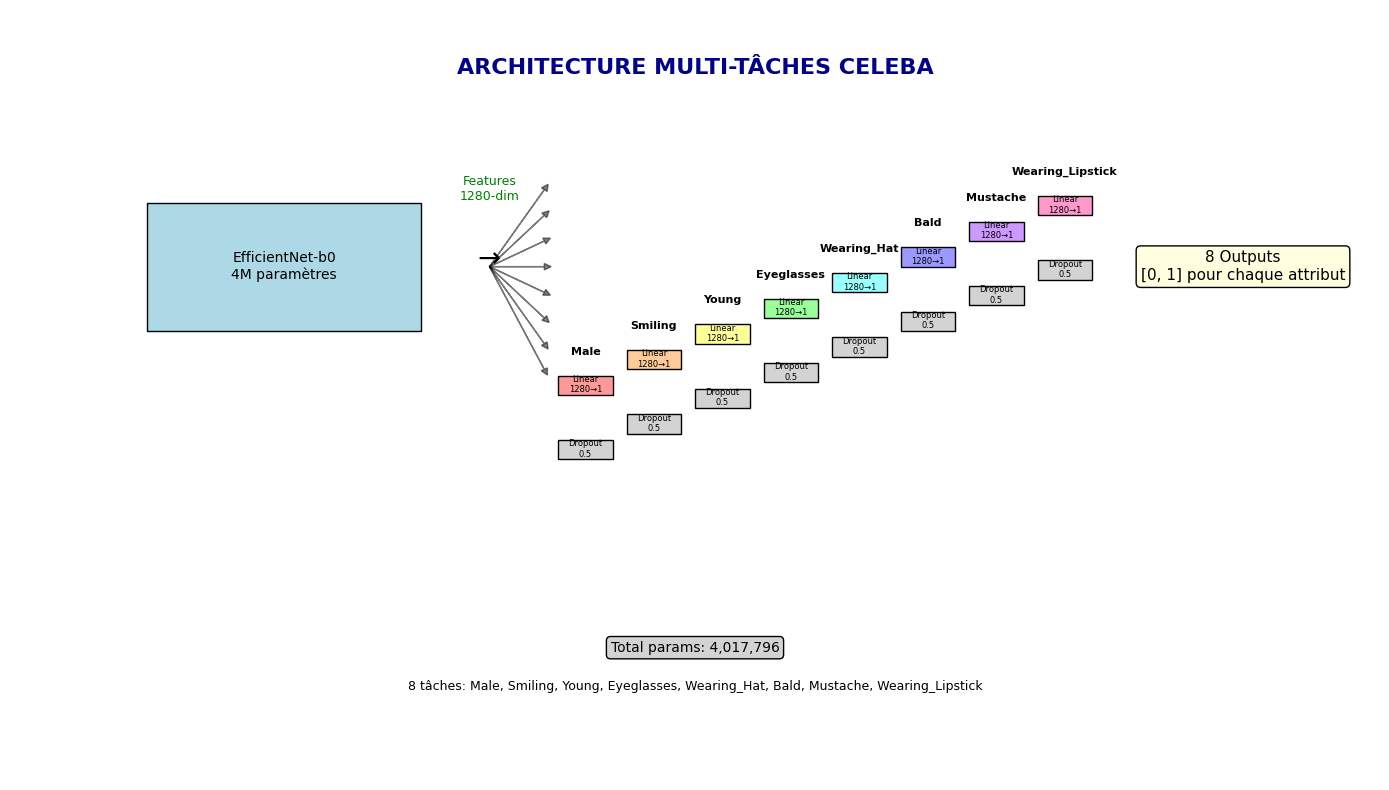

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_simple_architecture():
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')

    # Titre
    ax.text(5, 5.5, 'ARCHITECTURE MULTI-TÂCHES CELEBA',
            ha='center', fontsize=16, fontweight='bold', color='darkblue')

    # Backbone
    backbone_rect = patches.Rectangle((1, 3.5), 2, 1,
                                     facecolor='lightblue', edgecolor='black')
    ax.add_patch(backbone_rect)
    ax.text(2, 4, 'EfficientNet-b0\n4M paramètres',
            ha='center', va='center', fontsize=10)

    # Features
    ax.text(3.5, 4, '→', fontsize=20, ha='center')
    ax.text(3.5, 4.5, 'Features\n1280-dim',
            ha='center', va='bottom', fontsize=9, color='green')

    # Heads
    head_colors = ['#FF9999', '#FFCC99', '#FFFF99', '#99FF99',
                   '#99FFFF', '#9999FF', '#CC99FF', '#FF99CC']
    tasks = TARGET_ATTRS

    for i in range(8):
        # Dropout
        drop_rect = patches.Rectangle((4 + i*0.5, 2.5 + i*0.2), 0.4, 0.15,
                                    facecolor='lightgray', edgecolor='black')
        ax.add_patch(drop_rect)
        ax.text(4.2 + i*0.5, 2.58 + i*0.2, 'Dropout\n0.5',
                ha='center', va='center', fontsize=6)

        # Linear
        linear_rect = patches.Rectangle((4 + i*0.5, 3 + i*0.2), 0.4, 0.15,
                                      facecolor=head_colors[i], edgecolor='black')
        ax.add_patch(linear_rect)
        ax.text(4.2 + i*0.5, 3.08 + i*0.2, 'Linear\n1280→1',
                ha='center', va='center', fontsize=6)

        # Task name
        ax.text(4.2 + i*0.5, 3.3 + i*0.2, tasks[i],
                ha='center', va='bottom', fontsize=8, fontweight='bold')

        # Connections
        ax.arrow(3.5, 4, 0.4, -0.8 + i*0.2,
                head_width=0.05, head_length=0.05,
                fc='black', ec='black', alpha=0.5)

    # Outputs
    ax.text(9, 4, '8 Outputs\n[0, 1] pour chaque attribut',
            ha='center', va='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightyellow'))

    # Stats
    ax.text(5, 1, f'Total params: {sum(p.numel() for p in model.parameters()):,}',
            ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgray'))
    ax.text(5, 0.7, f'8 tâches: {", ".join(TARGET_ATTRS)}',
            ha='center', fontsize=9)

    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/architecture_simple.png", dpi=300, bbox_inches='tight')
    plt.show()

plot_simple_architecture()

In [51]:
!ls -lh "/content/drive/MyDrive/CelebA_MultiTask/models/"
!ls -lh "/content/drive/MyDrive/CelebA_MultiTask/"

total 63M
-rw------- 1 root root 47M Dec  7 23:47 BEST_FINETUNED_MODEL.pth
-rw------- 1 root root 16M Dec  7 02:18 BEST_MULTITASK_MODEL.pth
total 56M
-rw------- 1 root root 150K Dec  8 00:27 accuracy_bars.png
-rw------- 1 root root 278K Dec  8 00:10 architecture_simple.png
-rw------- 1 root root  23M Dec  6 19:28 attributes_binary.csv
-rw------- 1 root root 4.3M Dec  7 11:45 data_splits.json
-rw------- 1 root root 2.4K Dec  8 00:27 evaluation_report.txt
-rw------- 1 root root  728 Dec  8 00:27 evaluation_summary.csv
-rw------- 1 root root  11M Dec  7 00:11 final_dataloaders.pth
-rw------- 1 root root  11M Dec  7 00:11 final_datasets.pth
-rw------- 1 root root 4.3M Dec  7 00:11 final_splits.json
-rw------- 1 root root 118K Dec  7 23:51 finetuning_final_results.png
-rw------- 1 root root  252 Dec  7 11:44 metadata.json
drwx------ 2 root root 4.0K Dec  7 23:47 models
-rw------- 1 root root 160K Dec  8 00:27 performance_heatmap.png
-rw------- 1 root root 1.1M Dec  7 00:07 preprocessed_samp

In [55]:
# ================================================================
# ÉVALUATION FINALE SUR LE TEST SET OFFICIEL CELEBA
# ================================================================

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
from tqdm import tqdm
import numpy as np

# ------------------- 1. Chemins -------------------
MODEL_PATH = "/content/drive/MyDrive/CelebA_MultiTask/models/BEST_FINETUNED_MODEL.pth"
IMG_DIR = "/content/celeba/img_align_celeba/img_align_celeba"  # dossier avec toutes les images
CSV_ANNOTATIONS = "/content/celeba/list_attr_celeba.csv"       # le CSV officiel complet
TEST_LIST = "/content/celeba/list_eval_partition.csv"          # partition officielle

# ------------------- 2. Attributs (exactement les tiens) -------------------
TARGET_ATTRS = ['Male', 'Smiling', 'Young', 'Eyeglasses',
                'Wearing_Hat', 'Bald', 'Mustache', 'Wearing_Lipstick']

# ------------------- 3. Recréer l'architecture exacte -------------------
class MultiTaskCelebAExact(nn.Module):
    def __init__(self, num_tasks=8):
        super().__init__()
        self.backbone = models.efficientnet_b0(weights=None)
        self.backbone.classifier = nn.Identity()
        self.heads = nn.ModuleList([
            nn.Sequential(nn.Dropout(0.5), nn.Linear(1280, 1)) for _ in range(num_tasks)
        ])

    def forward(self, x):
        f = self.backbone(x)
        return torch.cat([torch.sigmoid(head(f)) for head in self.heads], dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiTaskCelebAExact(num_tasks=8).to(device)

# Charger le meilleur modèle
checkpoint = torch.load(MODEL_PATH, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
print(f"Modèle chargé : epoch {checkpoint['epoch']} | Val loss {checkpoint['val_loss']:.4f}")

# ------------------- 4. Transformations test -------------------
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ================== TEST SET OFFICIEL - VERSION INDESTRUCTIBLE ==================
class CelebATestDataset(Dataset):
    def __init__(self, img_dir, annotations_csv, partition_csv, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        print("Chargement annotations...")
        df_attr = pd.read_csv(annotations_csv)
        df_part = pd.read_csv(partition_csv)

        for col in TARGET_ATTRS:
            df_attr[col] = pd.to_numeric(df_attr[col], errors='coerce').fillna(0).astype(int)

        df = df_attr[['image_id'] + TARGET_ATTRS].merge(df_part, on='image_id')
        self.df_test = df[df['partition'] == 2].reset_index(drop=True)
        self.df_test[TARGET_ATTRS] = self.df_test[TARGET_ATTRS].replace(-1, 0)
        self.labels_np = self.df_test[TARGET_ATTRS].values.astype(np.float32)
        print(f"Test set : {len(self.df_test)} images")

    def __len__(self): return len(self.df_test)
    def __getitem__(self, idx):
        img_name = self.df_test.iloc[idx]['image_id']
        image = Image.open(os.path.join(self.img_dir, img_name)).convert('RGB')
        if self.transform: image = self.transform(image)
        label = torch.from_numpy(self.labels_np[idx])
        return image, label

test_dataset = CelebATestDataset(IMG_DIR, CSV_ANNOTATIONS, TEST_LIST, test_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0, pin_memory=True)
# ==============================================================================

# ------------------- 6. Évaluation -------------------
criterion = nn.BCELoss()

total_loss = 0.0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Évaluation Test Set"):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        all_preds.append(outputs.cpu())
        all_labels.append(labels.cpu())

test_loss = total_loss / len(test_loader)
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)
preds_binary = (all_preds > 0.5).float()
test_accuracy = (preds_binary == all_labels).float().mean().item()

print("\n" + "="*60)
print(f"RÉSULTATS FINAUX SUR LE TEST SET OFFICIEL CELEBA ({len(test_dataset)} images)")
print("="*60)
print(f"Test BCE Loss     : {test_loss:.4f}")
print(f"Test Accuracy     : {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Comparaison val   : {checkpoint['val_loss']:.4f} → test {test_loss:.4f}")

# ------------------- 7. Métriques par attribut -------------------
print("\nDÉTAIL PAR ATTRIBUT")
print("-" * 80)
print(f"{'Attribut':20} {'Acc (%)':>8} {'Prec (%)':>8} {'Rec (%)':>8} {'F1 (%)':>8}")
print("-" * 80)

for i, attr in enumerate(TARGET_ATTRS):
    p = all_preds[:, i]
    y = all_labels[:, i]
    pred_bin = (p > 0.5).float()

    acc = (pred_bin == y).float().mean().item()
    tp = (pred_bin * y).sum().item()
    precision = tp / max(pred_bin.sum().item(), 1)
    recall = tp / max(y.sum().item(), 1)
    f1 = 2 * precision * recall / max(precision + recall, 1e-8)

    print(f"{attr:20} {acc*100:8.2f} {precision*100:8.2f} {recall*100:8.2f} {f1*100:8.2f}")

print("\nÉvaluation terminée ! Le modèle est officiellement testé sur le vrai test set.")

Modèle chargé : epoch 6 | Val loss 0.1333
Chargement annotations...
Test set : 19962 images


Évaluation Test Set: 100%|██████████| 312/312 [01:23<00:00,  3.74it/s]


RÉSULTATS FINAUX SUR LE TEST SET OFFICIEL CELEBA (19962 images)
Test BCE Loss     : 0.1385
Test Accuracy     : 0.9438 (94.38%)
Comparaison val   : 0.1333 → test 0.1385

DÉTAIL PAR ATTRIBUT
--------------------------------------------------------------------------------
Attribut              Acc (%) Prec (%)  Rec (%)   F1 (%)
--------------------------------------------------------------------------------
Male                    96.39    93.60    97.30    95.42
Smiling                 88.14    97.59    78.23    86.84
Young                   86.87    89.28    93.93    91.55
Eyeglasses              99.25    94.67    93.72    94.19
Wearing_Hat             98.76    85.82    84.39    85.10
Bald                    98.78    72.21    68.79    70.46
Mustache                96.30    54.93    23.83    33.24
Wearing_Lipstick        90.59    94.77    86.75    90.58

Évaluation terminée ! Le modèle est officiellement testé sur le vrai test set.
